In [3]:
import sys
!{sys.executable} -m pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 3.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 2.0 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.0 MB 2.0 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.0 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   ------------ --------------------------- 3.4/11.0 MB 1.9 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/11.0 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 5.2/11.0 MB 2.4 MB/s eta 0:00:03
   ---------------------- ----------------- 6.0/11.0 MB 2.6 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.0 MB 2.7 MB/s eta 0:00:02
   ---


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------- ---------------- 1.0/1.8 MB 5.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("homeprices.csv")

In [18]:
data.head(3)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000


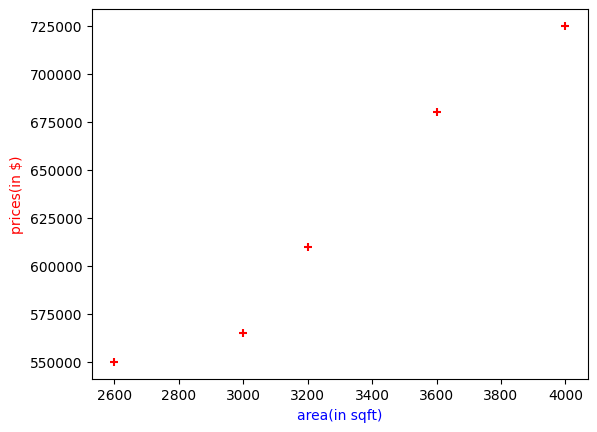

In [23]:
plt.scatter(data["area"],data["price"] ,marker ="+",c="r")
plt.xlabel("area(in sqft)",c = "b")
plt.ylabel("prices(in $)",c = "r")
plt.show()

In [31]:
df = data.drop("price",axis="columns")


In [32]:
df.head()

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [37]:
prices = data.price
prices

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [39]:
reg = linear_model.LinearRegression()
reg.fit(df,prices)

LinearRegression()

In [40]:
reg.predict([[3300]])

C:\Users\anj20\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [42]:
reg.coef_

array([135.78767123])

In [44]:
reg.intercept_

np.float64(180616.43835616432)

In [45]:
test = pd.read_csv("areas.csv")

In [52]:
test.head(2)

,area
0,1000
1,1500


In [56]:
points = reg.predict(test)


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [66]:
test["prices"] = points
test.head(3)

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


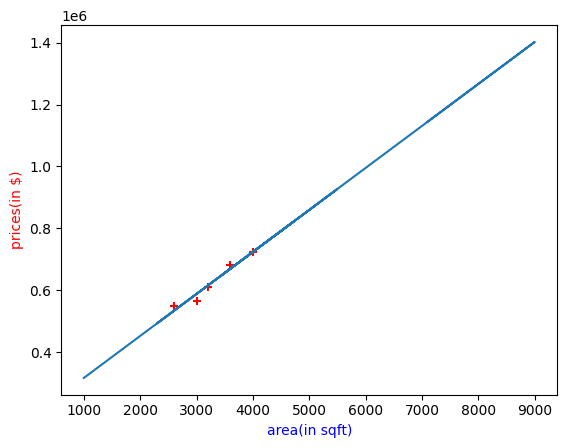

In [68]:
plt.scatter(data["area"],data["price"] ,marker ="+",c="r")
plt.xlabel("area(in sqft)",c = "b")
plt.ylabel("prices(in $)",c = "r")
plt.plot(test.area,points)
plt.show()